In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Example Analysis: Dataset "mpg" (cars)

In [18]:
DF = sns.load_dataset("mpg")
DF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [19]:
DF = sns.load_dataset("mpg")
DF.drop("name", axis=1, inplace=True)
# DF = DF[DF["origin"] != "usa"]  # USA is not a country (says github copilot)
DF = DF.melt(
    id_vars=["model_year", "origin", "cylinders"],
    var_name="measurement",
    value_name="value",
)
DF

,model_year,origin,cylinders,measurement,value
0,70,usa,8,mpg,18.0
1,70,usa,8,mpg,15.0
2,70,usa,8,mpg,18.0
3,70,usa,8,mpg,16.0
4,70,usa,8,mpg,17.0
...,...,...,...,...,...
1985,82,usa,4,acceleration,15.6
1986,82,europe,4,acceleration,24.6
1987,82,usa,4,acceleration,11.6
1988,82,usa,4,acceleration,18.6


In [20]:
dims = dict(
    y="value",
    x="model_year",
    hue="origin",
    col="measurement",
    # row="origin",
)
DA4 = plst.DataAnalysis(DF, dims, verbose=True)
# DA4.catplot(sharey=False)

#! Checking data integrity...
✅ DATA COMPLETE: All combinations of levels from selected factors are present
   in the Dataframe, including x.
❗️ GROUPS INCOMPLETE: Groups/facets contain single NaNs. 👉 Call
   .get_rows_with_NaN() to see them all.
   These are the first 5 rows with NaNs:
   |                              |   cylinders |   value |
   |:-----------------------------|------------:|--------:|
   | ('horsepower', 'europe', 80) |           4 |     nan |
   | ('horsepower', 'europe', 81) |           4 |     nan |
   | ('horsepower', 'usa', 71)    |           4 |     nan |
   | ('horsepower', 'usa', 74)    |           6 |     nan |
   | ('horsepower', 'usa', 80)    |           4 |     nan |
🫠 GROUPS UNEQUAL: Groups (195 total) have different samplesizes (n = 10.2
   ±7.3).
   👉 Call .data_get_samplesizes() to see them.
   These are the 5 groups with the largest samplesizes:
   |                             |   value |
   |:----------------------------|--------:|
   | ('accelera

In [21]:
DA4.test_pairwise(paired=False, parametric=False)

model_year   A   B    mean(A)  \
measurement  origin Contrast                                            
mpg          -      model_year                   -  70  71  17.689655   
                    model_year                   -  70  72  17.689655   
                    model_year                   -  70  73  17.689655   
                    model_year                   -  70  74  17.689655   
                    model_year                   -  70  75  17.689655   
...                                            ...  ..  ..        ...   
acceleration usa    origin * model_year        NaN  79  81  15.243478   
                    origin * model_year        NaN  79  82  15.243478   
                    origin * model_year        NaN  80  81  16.800000   
                    origin * model_year        NaN  80  82  16.800000   
                    origin * model_year        NaN  81  82  16.053846   

                                           std(A)    mean(B)    std(B) Paired  \
measurement  origin Contrast                                                    
mpg          -      model_year           5.339231  21.250000  6.591942  False   
                    model_year           5.339231  18.714286  5.435529  False   
                    model_year           5.339231  17.100000  4.700245  False   
                    model_year           5.339231  22.703704  6.420010  False   
                    model_year           5.339231  20.266667  4.940566  False   
...                                           ...        ...       ...    ...   
acceleration usa    origin * model_year  2.346918  16.053846  2.199475  False   
                    origin * model_year  2.346918  16.670000  2.250170  False   
                    origin * model_year  2.235322  16.053846  2.199475  False   
                    origin * model_year  2.235322  16.670000  2.250170  False   
                    origin * model_year  2.199475  16.670000  2.250170  False   

                                         Parametric  U-val alternative  \
measurement  origin Contrast                                             
mpg          -      model_year                False  283.0   two-sided   
                    model_year                False  382.5   two-sided   
                    model_year                False  631.0   two-sided   
                    model_year                False  220.0   two-sided   
                    model_year                False  313.5   two-sided   
...                                             ...    ...         ...   
acceleration usa    origin * model_year       False  115.5   two-sided   
                    origin * model_year       False  141.0   two-sided   
                    origin * model_year       False   51.5   two-sided   
                    origin * model_year       False   70.0   two-sided   
                    origin * model_year       False  104.5   two-sided   

                                            p-unc    hedges **p-unc    Sign.  \
measurement  origin Contrast                                                   
mpg          -      model_year           0.049768 -0.586529       *  signif.   
                    model_year           0.712617 -0.187609      ns    False   
                    model_year           0.537921  0.117138      ns    False   
                    model_year           0.004885 -0.840197      **  signif.   
                    model_year           0.065608 -0.494712   0.066   toler.   
...                                           ...       ...     ...      ...   
acceleration usa    origin * model_year  0.269428 -0.345110      ns    False   
                    origin * model_year  0.031055 -0.608127       *  signif.   
                    origin * model_year  0.662718  0.323143      ns    False   
                    origin * model_year  1.000000  0.056111      ns    False   
                    origin * model_year  0.356397 -0.269481      ns    False   

                                

/Users/martinkuric/_REPOS/plotastic/venv/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


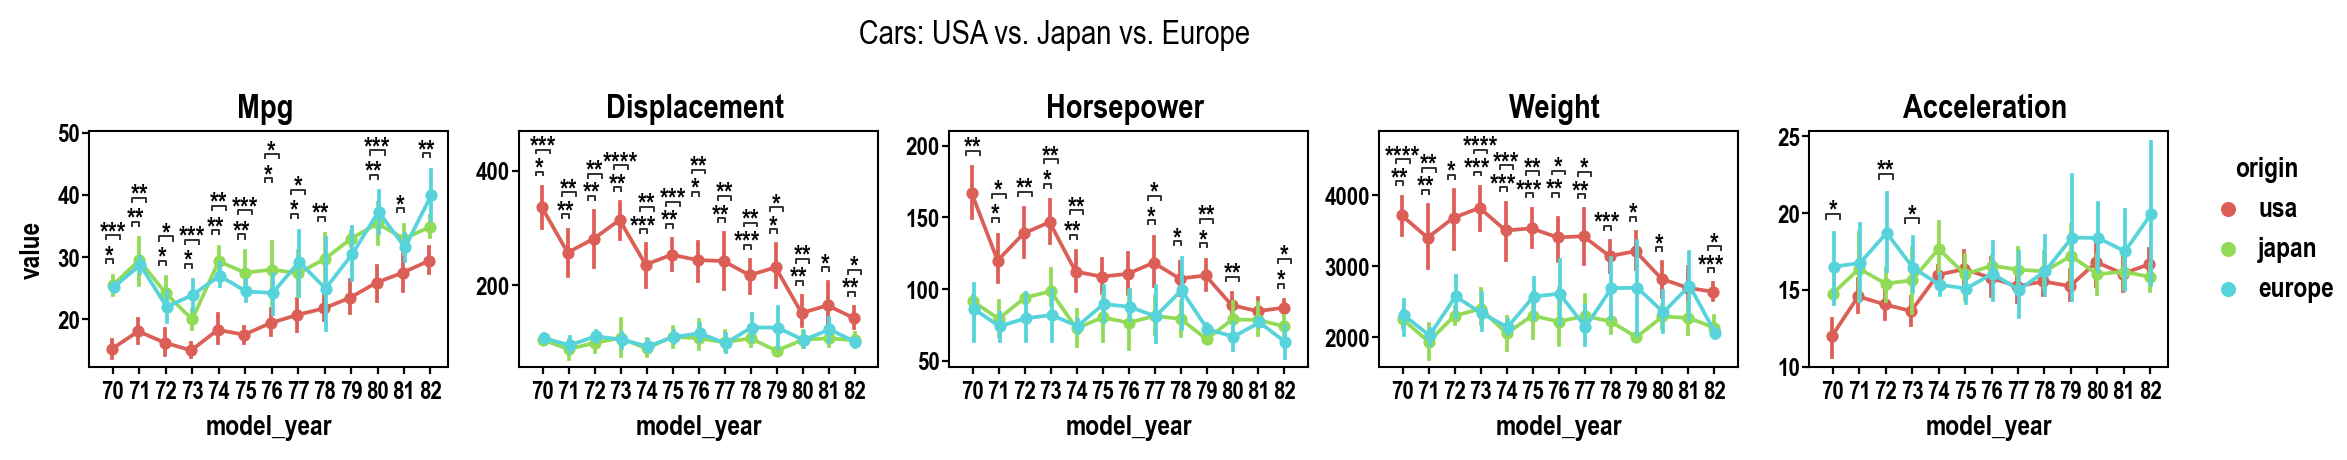

In [22]:
(
    DA4.subplots(
        figsize=(12, 2),
        sharey=False,
        wspace=0.2,
    )
    .fillaxes(
        kind="point",
        dodge=True,
    )
    .annotate_pairwise(
        include="__HUE",
    )
    .edit_legend()
)
plt.subplots_adjust(top=0.7)
plt.suptitle("Cars: USA vs. Japan vs. Europe")
plt.savefig("cars1.png", dpi=300, bbox_inches="tight")